In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import warnings
from scipy.optimize import curve_fit
warnings.filterwarnings("ignore", category=FutureWarning)
from merging_data_to_uniform_layout import datacut
from detecting_startstop_behaviour import timecut

In [2]:
pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# 🚀 Machine Learning Project: Data Processing and Analysis
### This Jupyterbook represents the Data Processing and Analysis part of the current project.

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Cleaning](#DataCleaning)
3. [US-Sensors](#US-Sensors)
4. [US-Data-Set-Built](#Data-Set-Built)

## Understanding the Data 📊 <a id="Introduction"></a>
For explanatory reasons, this section is exemplarily showing a section of the file  001_l_000N_fa_r_f.csv. It got modified to raw.csv prior in order to remove the string heading and modifying the delimiter. In the lab data, only the Reed switch time scale is in a different measuring frequency thus demanding its unique time axis

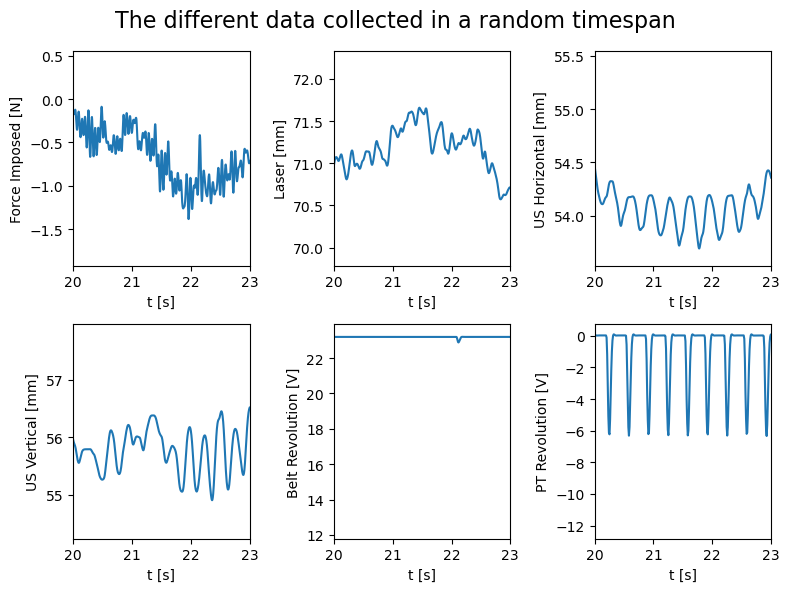

In [3]:
orig = pd.read_csv('Data/raw.csv')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, figsize=(8, 6))
X1 = orig.iloc[:, 0]
X2 = orig.iloc[:, 10]

# Plot the data
ax1.plot(X1, orig.iloc[:, 1], label='Force Imposed')
ax2.plot(X1, orig.iloc[:, 3], label='Laser')
ax3.plot(X1, orig.iloc[:, 5], label='US Horizontal')
ax4.plot(X1, orig.iloc[:, 7], label='US Vertical')
ax5.plot(X1, orig.iloc[:, 9], label='Belt Revolution')
ax6.plot(X2, orig.iloc[:, 11], label='PT Revolution')

# Set xlim for each subplot individually
ax1.set_xlim(left=20, right=23)
ax2.set_xlim(left=20, right=23)
ax3.set_xlim(left=20, right=23)
ax4.set_xlim(left=20, right=23)
ax5.set_xlim(left=20, right=23)
ax6.set_xlim(left=20, right=23)

# Add axis labels
ax1.set_xlabel('t [s]')
ax1.set_ylabel('Force Imposed [N]')
ax2.set_xlabel('t [s]')
ax2.set_ylabel('Laser [mm]')
ax3.set_xlabel('t [s]')
ax3.set_ylabel('US Horizontal [mm]')
ax4.set_xlabel('t [s]')
ax4.set_ylabel('US Vertical [mm]')
ax5.set_xlabel('t [s]')
ax5.set_ylabel('Belt Revolution [V]')
ax6.set_xlabel('t [s]')
ax6.set_ylabel('PT Revolution [V]')
fig.suptitle('The different data collected in a random timespan', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.savefig("Pics/Dataoverview.svg", format="svg")
plt.show()


<span style="color: green;">Description of Graphs:</span>
The Primetracker corrects the belt misalingment measured continuously by the laser. The misalignment is introduced to the system via the external force imposed on the conveyer belt. The ultrasonic sensors measure the deflection of the PT in horizontal and vertical direction. At every belt revolution, a tick can be observed. As two magnets are mounted on the PT in opposing positioning, per revolution two ticks can be observed

## Data Cleaning 🛠  <a id="DataCleaning"></a>

### Startup Behaviour

In some data, the logging was started prior to the conveyer belt or stopped after the belt itself stopped. Thus the transient startup behavior is part of the data set. These effects however shall not be used for ML training, further has to be detected and cut. This can be visually obtained as well, as the revolution of the PT is not detected periodically in the first seconds of the dataset. This is exemplaically shown in the following plot and has to be handled in the further process

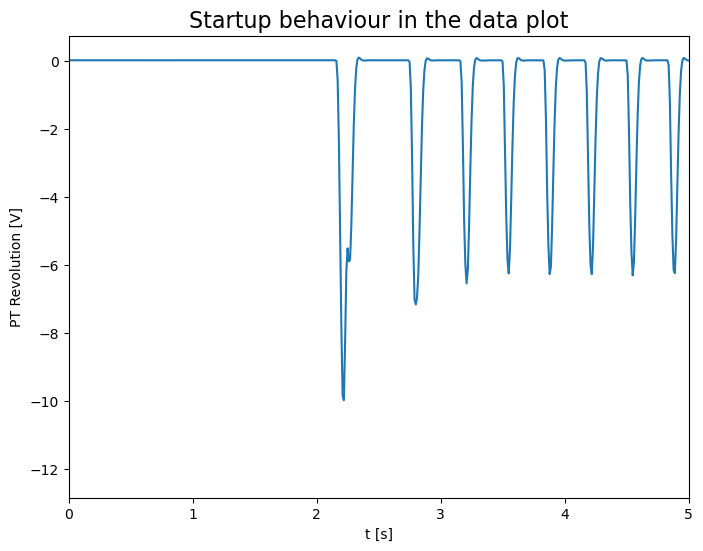

In [4]:
orig = pd.read_csv('Data/raw.csv')
fig, ax1 = plt.subplots(figsize=(8, 6))  # Create a subplot
ax1.plot(orig.iloc[:, 10], orig.iloc[:, 11], label='PT Revolution')
ax1.set_xlim(left=0, right=5)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('PT Revolution [V]')

# Title and layout adjustments
ax1.set_title('Startup behaviour in the data plot', fontsize=16)
plt.savefig("Pics/Startup.svg", format="svg")
plt.show()


In order to cope with this data artefacts, a custom detecting_startstop_behavior.py program was written. Its logic bases on a statisitc analysis of the time between ticks. From both the beginning and the end of the dataset, each duration between ticks must lie in the [0.2, 0.8] interval of all ticks. The 
As mentioned in the first chapter, the provided data has to be merged into a manageable format. Thus the program merging_data_to_uniform_layout.py rearranges the datapoint into a stadardised formfactor.


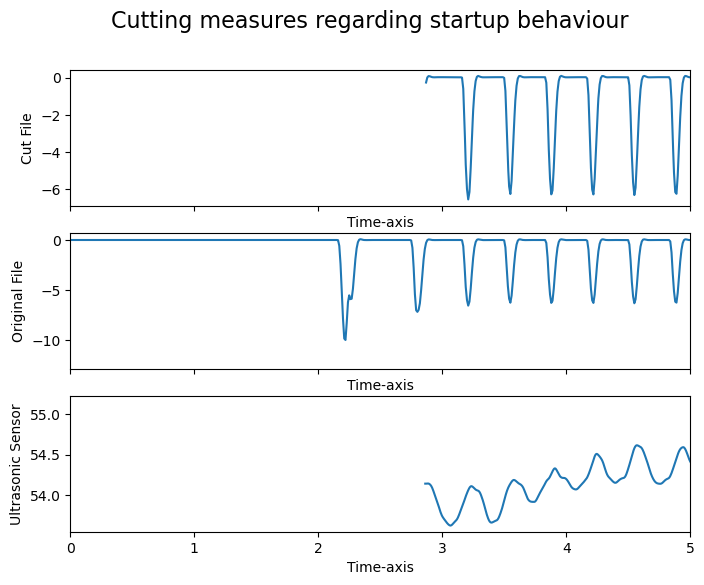

<Figure size 640x480 with 0 Axes>

In [5]:
orig = pd.read_csv('Data/raw.csv')
cut = pd.read_csv('Data/data.csv')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 6))
X1 = cut.loc[:, 'Timestamp']
Y1 = cut.loc[:, 'PT Revolution']
Y3 = cut.loc[:, 'US horizontal']
X2 = orig.iloc[:, 10]
Y2 = orig.iloc[:, 11]
ax1.plot(X1, Y1)
ax1.set_ylabel('Cut File')
ax1.set_xlabel('Time-axis')
ax2.plot(X2, Y2)
ax2.set_xlabel('Time-axis')
ax2.set_ylabel('Original File')
ax3.plot(X1, Y3, label='Ultrasonic')
ax3.set_xlabel('Time-axis')
ax3.set_ylabel('Ultrasonic Sensor')
ax1.set_xlim(left=0, right=5)
ax2.set_xlim(left=0, right=5)
ax3.set_xlim(left=0, right=5)
fig.suptitle('Cutting measures regarding startup behaviour', fontsize=16)
plt.savefig("Pics/Cuttingmeasures.svg", format="svg")
plt.show()
plt.tight_layout()

In [6]:
from merging_data_to_uniform_layout import datacut
it = datacut('Data/Original/' + '001_l_000N_fa_r_f.csv')
tc = timecut(it)
df = tc.statcut()

Column  0  is ok
Column  2  is ok
Column  4  is ok
Column  6  is ok
Column  8  is ok
Column  10  is ok
Initial length:  223 
 Cut ticks at beginning:  3 
 Cut away ticks at ending:  6 
 Resumes in  214 Ticks 
 The average Revolution duration[ms] :  0.8071740467452144
Initial length:  215 
 Cut ticks at beginning:  1 
 Cut away ticks at ending:  0 
 Resumes in  214 Ticks 
 The average Revolution duration[ms] :  0.6678881631341094


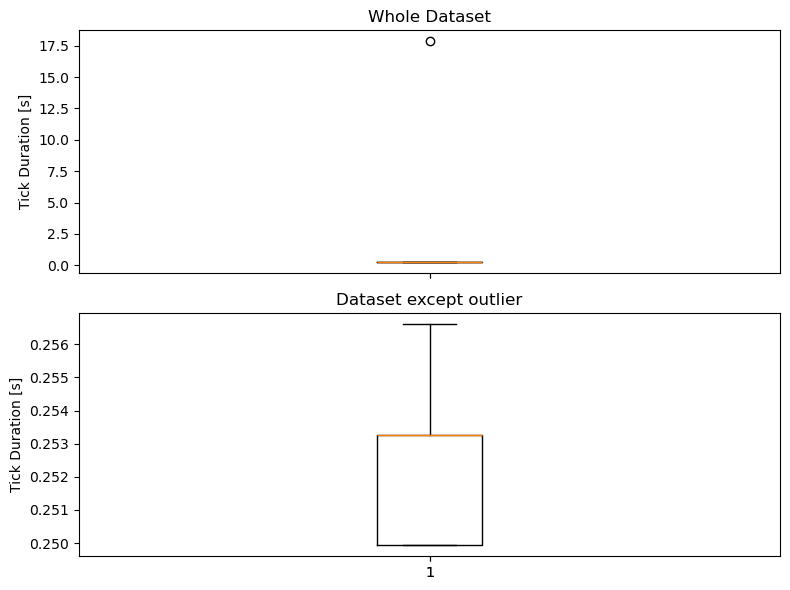

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.boxplot(tc.get_tickstat().loc['Time'])
ax1.set_title("Whole Dataset")
ax1.set_ylabel("Tick Duration [s]")
ax2.boxplot(tc.get_tickstat().loc['Time'].iloc[2:])
ax2.set_title("Dataset except outlier")
ax2.set_ylabel("Tick Duration [s]")
plt.tight_layout()
plt.show()

### Finding corrleations between measurements


This matrix shows the correlation between the sensors. An objective thus can be derived: There is a correlation between the imposed force and the horizontal US Sensor, which could be used to train a ML-Model.

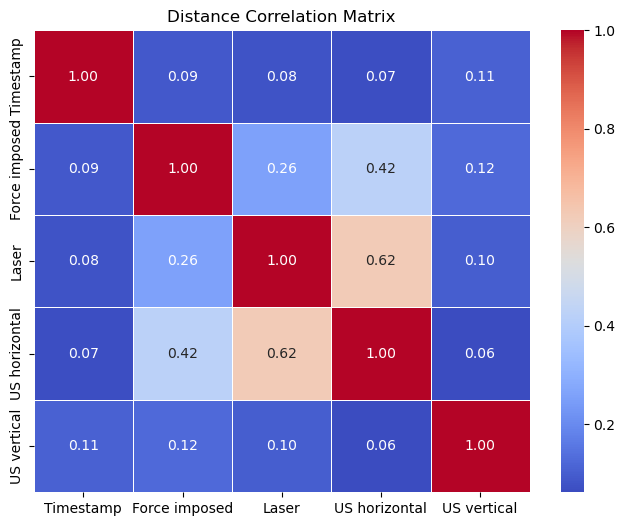

In [21]:
import seaborn as sns
import dcor  # Für Distance Correlation

data = pd.read_csv('Data/data.csv')
df = data.iloc[:, :5]

# Distance Correlation Matrix
n = df.shape[1]  # Anzahl der Variablen
dcor_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        dcor_matrix[i, j] = dcor.distance_correlation(df.iloc[:, i], df.iloc[:, j])
dcor_df = pd.DataFrame(dcor_matrix, index=df.columns, columns=df.columns)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(dcor_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Distance Correlation Matrix")
plt.savefig("Pics/Correlation.svg", format="svg")
plt.show()

## US-Sensors: Data Noise, Cleaning and Smoothing <a id="US-Sensors"></a>
This project is aimed to be introduced into an industrial environment. Therefore, not all the sensors avaliable in the lab can be realised. This results in a focus on the US-sensors and the Reed Sensors, as these can be built neatly into the PT itself in an industrial application. All the other sensors are only used for model training (Force Imposed) or neglected (Laser). Looking at the output of the US-Sensors, two sine courves can be observed.
These can furthermore be proven via an Fast Fourier Transformation. This is an operation which splits a function in a sum of sublying frequencies. Two dominant frequencies then can be seen in the FFT-Spectrum. Out of these two dominant frequencies, a representative sine is built.


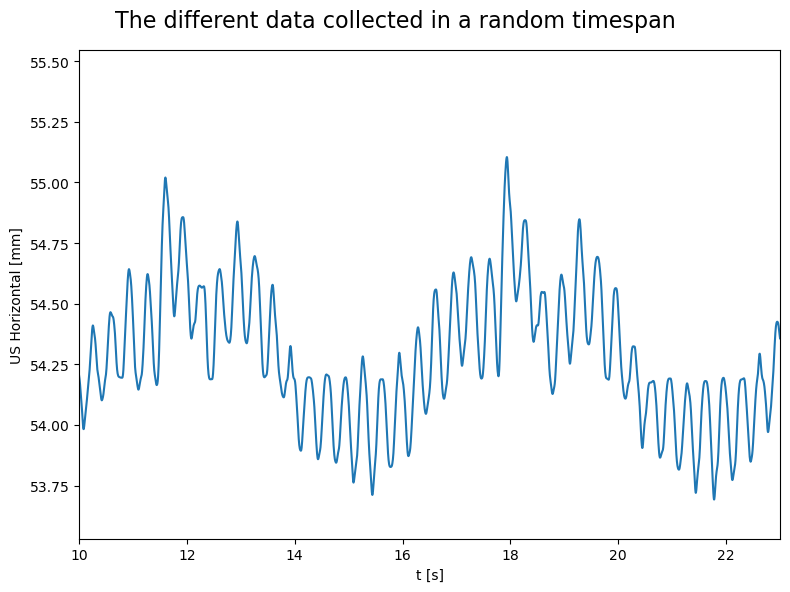

In [9]:
orig = pd.read_csv('Data/raw.csv')

fig, ax1 = plt.subplots(figsize=(8, 6))
X1 = orig.iloc[:, 0]
X2 = orig.iloc[:, 10]

ax1.plot(X1, orig.iloc[:, 5], label='US Horizontal')
ax1.set_xlim(left=10, right=23)
ax1.set_xlabel('t [s]')
ax1.set_ylabel('US Horizontal [mm]')
fig.suptitle('The different data collected in a random timespan', fontsize=16)
plt.tight_layout()
plt.savefig("Pics/US-Sensor_random.svg", format="svg")

plt.show()

Estimated Frequencies: 2.99 Hz, 0.15 Hz


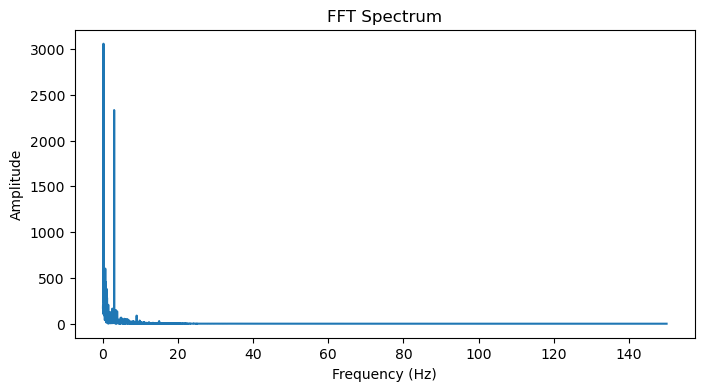

Fitted Parameters:
A1 = -0.22, f1 = 2.99 Hz, phi1 = 0.14
A2 = -0.34, f2 = 0.16 Hz, phi2 = -1.00
Y-Shift (C) = 54.29


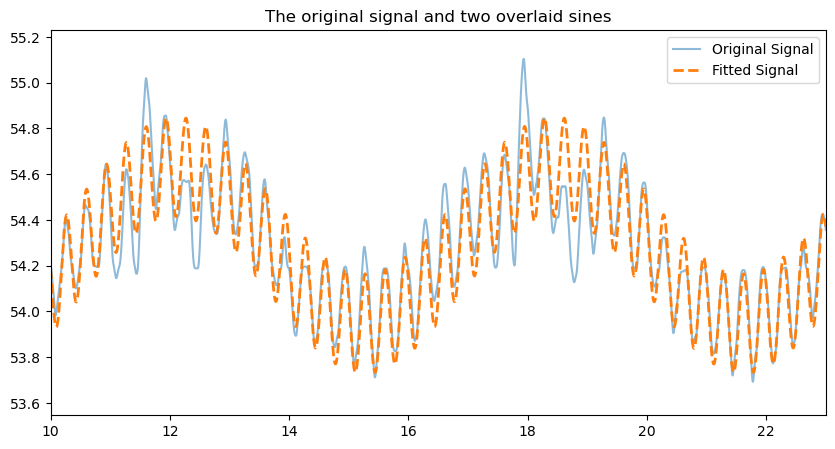

In [10]:
def fft_2(signal, t):

    fft_vals = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(t), d=(t[1] - t[0]))  # Frequency axis
    
    # Only consider positive frequencies
    pos_mask = freqs > 0
    freqs = freqs[pos_mask]
    fft_vals = np.abs(fft_vals[pos_mask])
    
    # Identify the two dominant frequencies
    sorted_indices = np.argsort(fft_vals)[-2:]  # Get top 2 peaks
    estimated_f1, estimated_f2 = freqs[sorted_indices]
    
    print(f"Estimated Frequencies: {estimated_f1:.2f} Hz, {estimated_f2:.2f} Hz")
    
    # Plot FFT Spectrum
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, fft_vals)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title("FFT Spectrum")
    plt.savefig("Pics/FFT_Spectrum.svg", format="svg")
    plt.show()

    # Define the extended sine wave model with a y-axis shift
    def sine_model(t, A1, f1, phi1, A2, f2, phi2, C):
        return A1 * np.sin(2 * np.pi * f1 * t + phi1) + A2 * np.sin(2 * np.pi * f2 * t + phi2) + C
    
    # Initial parameter guess: (A1, f1, phi1, A2, f2, phi2, C)
    initial_guess = [3, estimated_f1, 0, 2, estimated_f2, 0, np.mean(signal)]
    
    # Fit the model to the signal
    params, _ = curve_fit(sine_model, t, signal, p0=initial_guess, maxfev=10000)
    
    # Extract fitted parameters
    A1_fit, f1_fit, phi1_fit, A2_fit, f2_fit, phi2_fit, C_fit = params
    
    # Generate fitted signal
    fitted_signal = sine_model(t, A1_fit, f1_fit, phi1_fit, A2_fit, f2_fit, phi2_fit, C_fit)
    # Print results
    print(f"Fitted Parameters:")
    print(f"A1 = {A1_fit:.2f}, f1 = {f1_fit:.2f} Hz, phi1 = {phi1_fit:.2f}")
    print(f"A2 = {A2_fit:.2f}, f2 = {f2_fit:.2f} Hz, phi2 = {phi2_fit:.2f}")
    print(f"Y-Shift (C) = {C_fit:.2f}")
    return fitted_signal
dataset = pd.read_csv('Data/data.csv')    
sig = dataset.iloc[:, 3]
time =  dataset.iloc[:, 0]
raw = dataset.iloc[:, 3]
fit = fft_2(sig, time)
t =  dataset.iloc[:, 0]

# Plot original and fitted signal
plt.figure(figsize=(10, 5))
plt.plot(time, raw, label="Original Signal", alpha=0.5)
plt.plot(time, fit, label="Fitted Signal", linestyle="--", linewidth=2)
plt.xlim(left=10, right=23)
plt.legend()
plt.title("The original signal and two overlaid sines")
plt.savefig("Pics/FFT2_fitted.svg", format="svg")
plt.show()
    



The two sines can be easily explained from the lab setup. The higher frequent sine represents every revolution of the PT itself, as minor defects in production causes minimal irregularities in the round shape. The slower frequent sine represents one total belt revolution.
This finding enables three depths of data quality:
* Using the originally recorded data, with possibly some filtering to avoid outliers. This results in the least data loss, however comes with a lot of noise. This might come into effect when even small derivations are relevant.
* Using the artificial two-sine signal as a clean, close to reality approximation.
* Using only the slower frequent sine as the overall belt rotation as the most reduced solution:


Estimated Frequencies: 0.15 Hz


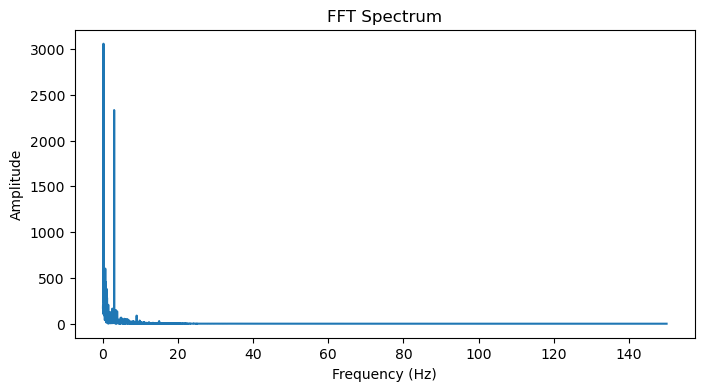

Fitted Parameters:
A1 = -0.34, f1 = 0.16 Hz, phi1 = -0.99
Y-Shift (C) = 54.29


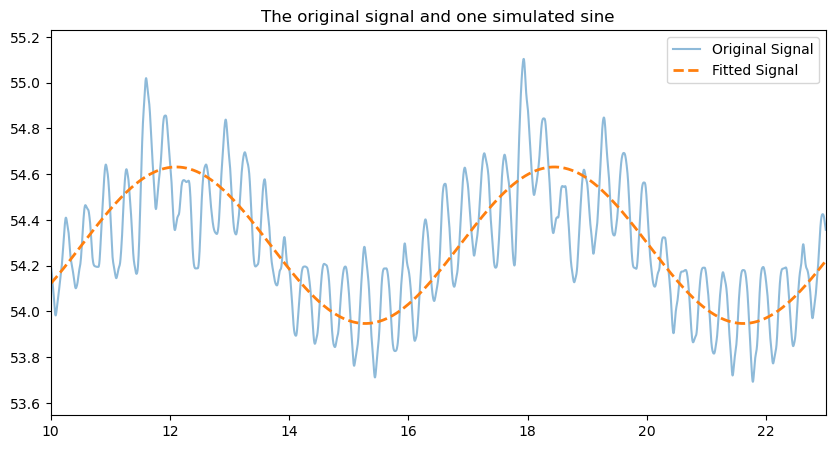

In [11]:
def fft_1(signal, t):
    fft_vals = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(t), d=(t[1] - t[0]))  # Frequency axis
    
    # Only consider positive frequencies
    pos_mask = freqs > 0
    freqs = freqs[pos_mask]
    fft_vals = np.abs(fft_vals[pos_mask])
    
    # Identify the dominant frequency
    estimated_f1 = freqs[np.argmax(fft_vals)]
    
    print(f"Estimated Frequencies: {estimated_f1:.2f} Hz")
    
    # Plot FFT Spectrum
    plt.figure(figsize=(8, 4))
    plt.plot(freqs, fft_vals)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.title("FFT Spectrum")
    plt.show()

    # Define the extended sine wave model with a y-axis shift
    def sine_model(t, A1, f1, phi1, C):
        return A1 * np.sin(2 * np.pi * f1 * t + phi1)+ C
    
    # Initial parameter guess: (A1, f1, phi1, A2, f2, phi2, C)
    initial_guess = [3, estimated_f1, 0, np.mean(signal)]
    
    # Fit the model to the signal
    params, _ = curve_fit(sine_model, t, signal, p0=initial_guess, maxfev=10000)
    
    # Extract fitted parameters
    A1_fit, f1_fit, phi1_fit, C_fit = params
    
    # Generate fitted signal
    fitted_signal = sine_model(t, A1_fit, f1_fit, phi1_fit, C_fit)
    # Print results
    print(f"Fitted Parameters:")
    print(f"A1 = {A1_fit:.2f}, f1 = {f1_fit:.2f} Hz, phi1 = {phi1_fit:.2f}")
    print(f"Y-Shift (C) = {C_fit:.2f}")
    return fitted_signal

data = pd.read_csv('Data/data.csv')
sig = data.iloc[:, 3]
time =  data.iloc[:, 0]
fit = fft_1(sig, time)
raw = data.iloc[:, 3]
# Plot original and fitted signal
plt.figure(figsize=(10, 5))
plt.plot(time, raw, label="Original Signal", alpha=0.5)
plt.plot(time, fit, label="Fitted Signal", linestyle="--", linewidth=2)
plt.xlim(left=10, right=23)
plt.legend()
plt.title("The original signal and one simulated sine")
plt.savefig("Pics/FFT1_fitted.svg", format="svg")
plt.show()

### Smoothing the Force Imposed
This function smoothes the force imposed measurements. This is performed with the simple moving average method. As in the training, this will be the target values. Therefore things shall be kept simple.
As the force is introduced via a wheel, every revolution of the wheel can be found in the measuring data again. This however is not relevant to the model and thus shall vanish.

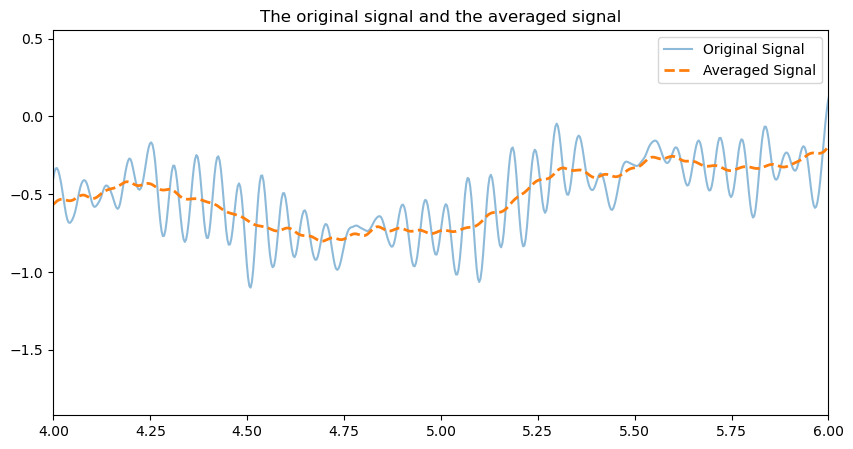

In [12]:
def moving_average(data, window_size=50):
    signal = data.iloc[:, 1]
    return signal.rolling(window=window_size, center=True).mean()

data = pd.read_csv('Data/data.csv')
av = moving_average(data)
raw = data.iloc[:, 1]
t =  data.iloc[:, 0]
# Plot original and fitted signal
plt.figure(figsize=(10, 5))
plt.plot(t, raw, label="Original Signal", alpha=0.5)
plt.plot(t, av, label="Averaged Signal", linestyle="--", linewidth=2)
plt.xlim(left=4, right=6)
plt.legend()
plt.title("The original signal and the averaged signal")
plt.savefig("Pics/movingaverage.svg", format="svg")
plt.show()

It can be obtained that the output signal is still noisy. Therefore another smoothing method shall be used: The gaussian filter. A smoother output can be archived.

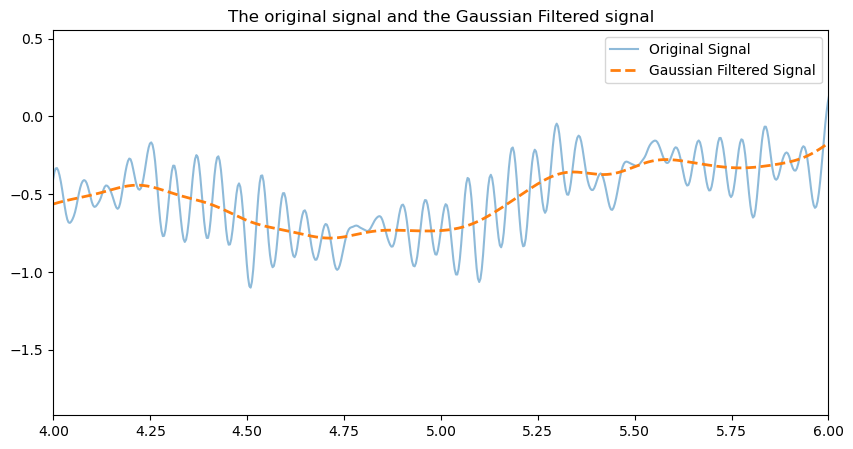

In [13]:
from scipy.ndimage import gaussian_filter1d
def gaussian(data):
    signal = data.iloc[:, 1]
    return gaussian_filter1d(signal, sigma=20)

data = pd.read_csv('Data/data.csv')
av = gaussian(data)
raw = data.iloc[:, 1]
t =  data.iloc[:, 0]
# Plot original and fitted signal
plt.figure(figsize=(10, 5))
plt.plot(t, raw, label="Original Signal", alpha=0.5)
plt.plot(t, av, label="Gaussian Filtered Signal", linestyle="--", linewidth=2)
plt.xlim(left=4, right=6)
plt.legend()
plt.title("The original signal and the Gaussian Filtered signal")
plt.savefig("Pics/Gaussian_filter.svg", format="svg")
plt.show()

### Effect of smoothing
The effects of the smoothing procedures shall be observed. The regarding criteria will be the correlation heatmap.

Estimated Frequencies: 0.15 Hz


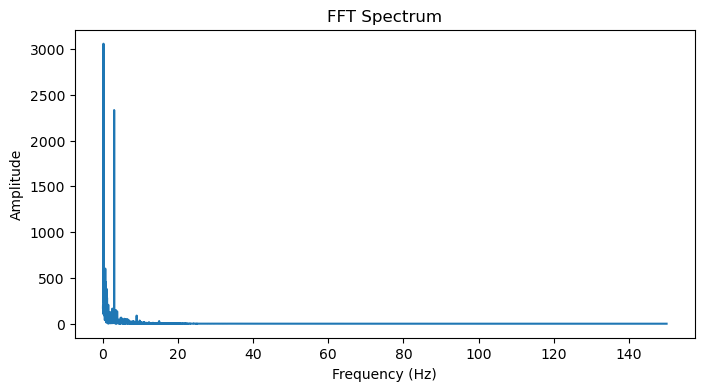

Fitted Parameters:
A1 = -0.34, f1 = 0.16 Hz, phi1 = -0.99
Y-Shift (C) = 54.29
Estimated Frequencies: 3.79 Hz


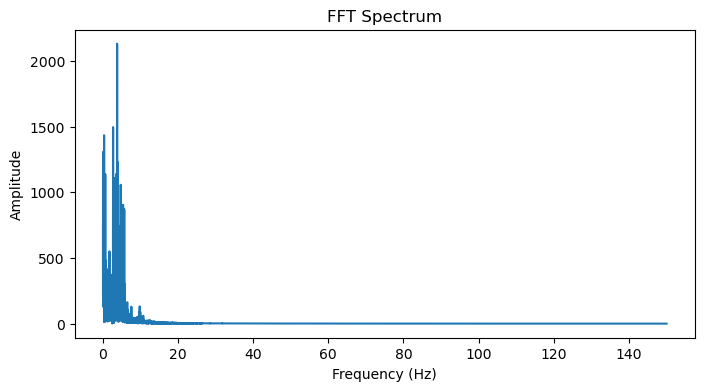

Fitted Parameters:
A1 = 0.20, f1 = 3.79 Hz, phi1 = -0.08
Y-Shift (C) = 55.88


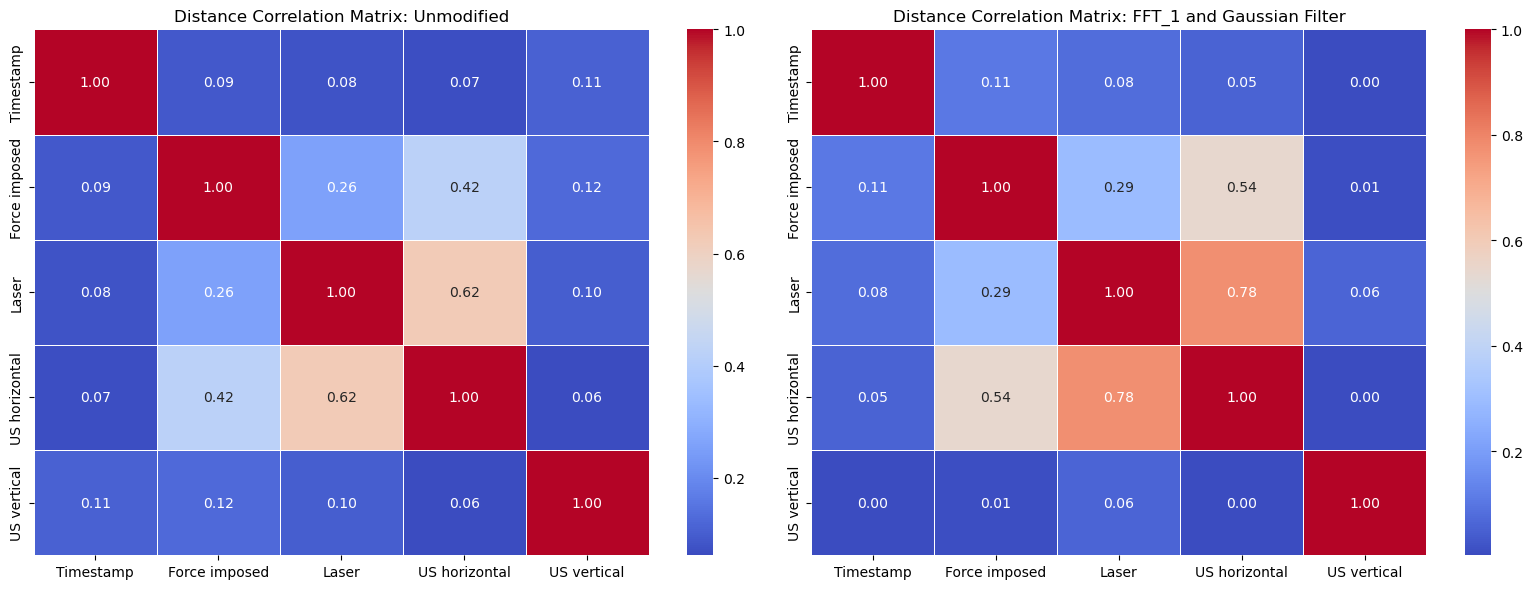

In [14]:
import dcor
import seaborn as sns

# Distance Correlation Matrix: Unmodified
data = pd.read_csv('Data/data.csv')
df = data.iloc[:, :5]

n = df.shape[1]
dcor_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dcor_matrix[i, j] = dcor.distance_correlation(df.iloc[:, i], df.iloc[:, j])
dcor_df = pd.DataFrame(dcor_matrix, index=df.columns, columns=df.columns)

# Distance Correlation Matrix: FFT_1 and Gaussian Filtered
mf = pd.read_csv('Data/data.csv').iloc[:, :5]
mf['Force imposed'] = gaussian(mf)
mf['US horizontal'] = fft_1(mf['US horizontal'], mf['Timestamp'])
mf['US vertical'] = fft_1(mf['US vertical'], mf['Timestamp'])

n = mf.shape[1]
dcor_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dcor_matrix[i, j] = dcor.distance_correlation(mf.iloc[:, i], mf.iloc[:, j])
dcor_mf = pd.DataFrame(dcor_matrix, index=mf.columns, columns=mf.columns)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(dcor_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Distance Correlation Matrix: Unmodified")
sns.heatmap(dcor_mf, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Distance Correlation Matrix: FFT_1 and Gaussian Filter")
plt.tight_layout()
plt.savefig("Pics/Comparison_Correlation_smoothed.svg", format="svg")
plt.show()

Less noisy data can lead to better correlation by reducing random variability, improving signal detection. Noise distorts true relationships, weakening both linear (Pearson) and rank-based (Spearman) correlations. By minimizing noise, data points can align more closely with the actual trend, resulting in a stronger and more accurate correlation. However, also the loss of information can weaken a correlation, as it can be obtained between the two US Sensors. The overall trends however withstand the smoothing procedures.

## Data Set Built 🔩 <a id="Data-Set-Built"></a>

The following information is found in the file name
* Force applied position: left (-1) to right (1)
* Idler state: blocked (1), free running/excentric (0)
* Force applied (This can also be found as a precise measurement)
* Field or lab data

The whole database can then be filtered undergoing these criteria and combined to a new datafile in order for training a specific ML-Model

### Regression for Weight approximation

The only relevant columns are:
* Timestamp
* Force Imposed (gaussian smoothed)
* US horizontal (fft: only main frequency)

  
The other data is not collected for efficiency reasons.

22 Files will be combined into one, resulting in 471547 lines in AML_dmf/db_reg_fft_2.csv

In [15]:
dic = '/home/jovyan/work/AML_dmf/Data/Original'
target1 = '_e'  # excentric
ntarget1 = '_o_'  # no outside/field data
ntarget2 = '_u_'  # no unknown load data
#Building a database for classification and the full 
def db_reg_fft_2():
    outp = pd.DataFrame(columns=['Timestamp', 'Force imposed', 'US horizontal'])
    for filename in os.listdir(dic):
        if filename.endswith('.csv') and ntarget1 not in filename and ntarget2 not in filename and target1 in filename:
            file_path = os.path.join(dic, filename)
            print(f"Found: {filename}")
            
#Processing naming, cutting procedure, smoothing and one-frequency FFT.
            df = datacut('Data/Original/' + filename)
            temp = pd.DataFrame(columns=['Timestamp', 'Force imposed', 'US horizontal'])
            temp['Timestamp'] = df['Timestamp']
            temp['Force imposed'] = gaussian(df)
            temp['US horizontal'] = fft_1(df['US horizontal'], df['Timestamp'])

 #Appending to main database
            outp = pd.concat([outp, temp], ignore_index=True)
            '''
            #For Debugging: Breaking after the first procedure and showing plot:
            plt.figure(figsize=(10, 5))
            t = outp['Timestamp']
            plt.plot(t, df['US horizontal'], label="Original Signal", alpha=0.5)
            plt.plot(t, temp['US horizontal'], label="Averaged Signal", linestyle="--", linewidth=2)
            plt.xlim(left=4, right=6)
            plt.legend()
            plt.title("The original signal and the averaged signal")
            plt.show()
            break
            # End debugging
            '''
        
    print('Tag-Lines total: ', len(outp))
    np.savetxt('db_reg_fft_2.csv', outp, delimiter=',')
# Uncomment to run the function, if AML_dmf/db_reg_fft_2.csv is not avaliable and shall be established.
#db_reg_fft_2()

### Classification for Weight approximation

The only relevant columns are:
* Timestamp
* Value provided from the experiment
* US horizontal (fft: only main frequency)
The other data is not collected for efficiency reasons.

22 Files will be combined into one

In [16]:
dic = '/home/jovyan/work/AML_dmf/Data/Original'
target1 = '_e'  # excentric
ntarget1 = '_o_'  # no outside/field data
ntarget2 = '_u_'  # no unknown load data
#Building a database for classification and the full 
def db_class_fft_2():
    outp = pd.DataFrame(columns=['Timestamp', 'Force imposed', 'US horizontal'])
    for filename in os.listdir(dic):
        if filename.endswith('.csv') and ntarget1 not in filename and ntarget2 not in filename and target1 in filename:
            file_path = os.path.join(dic, filename)
            print(f"Found: {filename}")
    
            # Processing idler state and force position
            if '000N' in filename:
                force = 0
            elif '050N' in filename:
                force = 50
            elif '100N' in filename:
                force = 100
            elif '150N' in filename:
                force = 150
            elif '200N' in filename:
                force = 200
            else:
                print('No valid weight syntax obtained!')
                sys.exit()
    
            #Processing naming, cutting procedure, smoothing and one-frequency FFT.
            df = datacut('Data/Original/' + filename)
            temp = pd.DataFrame(columns=['Timestamp', 'Force imposed', 'US horizontal'])
            temp['Timestamp'] = df['Timestamp']
            temp['Force imposed'] = force
            temp['US horizontal'] = fft_1(df['US horizontal'], df['Timestamp'])

            #Appending to main database
            outp = pd.concat([outp, temp], ignore_index=True)
            '''
            #For Debugging: Breaking after the first procedure and showing plot:
            plt.figure(figsize=(10, 5))
            t = outp['Timestamp']
            plt.plot(t, df['US horizontal'], label="Original Signal", alpha=0.5)
            plt.plot(t, temp['US horizontal'], label="Averaged Signal", linestyle="--", linewidth=2)
            plt.xlim(left=4, right=6)
            plt.legend()
            plt.title("The original signal and the averaged signal")
            plt.show()
            break
            # End debugging
            '''
        
    print('Tag-Lines total: ', len(outp))
    np.savetxt('db_class_fft_2.csv', outp, delimiter=',')
# Uncomment to run the function, if AML_dmf/db_reg_fft_2.csv is not avaliable and shall be established.
# db_class_fft_2()

### Regression for Idler State and Force Position
In order to assess correlations between the idler state, force imput and the US-Sensors, another correlation plot will be established. To do so, the information found in the filename is added into the databases.
The relevant columns are:
* Timestamp
* Position and idler state provided from the experiment
* US horizontal (fft: only main frequency)
* US vertical (fft: only main frequency)
The other data is not collected for efficiency reasons.


In [17]:
dic = '/home/jovyan/work/AML_dmf/Data/Original'
#target1 = '_e'  # excentric
ntarget1 = '_o_'  # no outside/field data
ntarget2 = '_u_'  # no unknown load position
ntarget3 = '_e'  # no excentric force
#Building a database for classification and the full 
def db_idler_fft_2():
    outp = pd.DataFrame(columns=['Timestamp', 'US horizontal','US vertical', 'Position', 'Idler'])
    for filename in os.listdir(dic):
        if filename.endswith('.csv') and ntarget1 not in filename and ntarget2 not in filename and ntarget3 not in filename:
            file_path = os.path.join(dic, filename)
            print(f"Found: {filename}")

            # Idler under force applied:  free running (0), blocked (1)
            # Force applied: left (-1), right (1)
            if 'fa_l_e' in filename or 'fa_l_f' in filename:
                position = -1
                idler = 0
            elif 'fa_r_e' in filename or 'fa_r_f' in filename:
                position = 1
                idler = 0
            elif 'fa_l_b' in filename:
                position = -1
                idler = 1
            elif 'fa_r_b' in filename:
                position = 1
                idler = 1
            else:
                print('No valid syntax obtained!')
                sys.exit()

            
            #Processing naming, cutting procedure, smoothing and two-frequency FFT.
            df = datacut('Data/Original/' + filename)
            temp = pd.DataFrame(columns=['Timestamp', 'US horizontal','US vertical', 'Position', 'Idler'])
            temp['Timestamp'] = df['Timestamp']
            temp['US horizontal'] = fft_2(df['US horizontal'], df['Timestamp'])
            temp['US vertical'] = fft_2(df['US vertical'], df['Timestamp'])
            temp['Position'] = position
            temp['Idler'] = idler
                
            #Appending to main database
            outp = pd.concat([outp, temp], ignore_index=True)

    print('Tag-Lines total: ', len(outp))
    np.savetxt('db_idler_fft_2.csv', outp, delimiter=',')

# Uncomment to run the function, if AML_dmf/db_idler_fft_2.csv is not avaliable and shall be established.
#db_idler_fft_2()

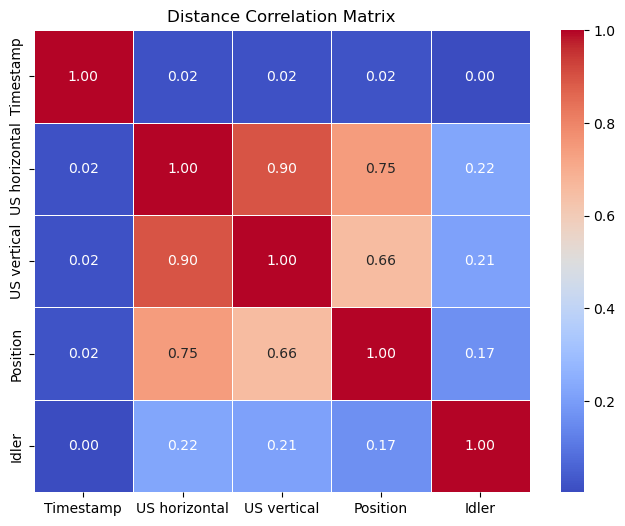

In [18]:
import seaborn as sns
import dcor  # Distance Correlation

data = pd.read_csv('db_idler_fft_2.csv')
df = data.iloc[:, :]
df.columns = ['Timestamp', 'US horizontal','US vertical', 'Position', 'Idler']
#  Distance Correlation Matrix berechnen
n = df.shape[1]  # Anzahl der Variablen
dcor_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        dcor_matrix[i, j] = dcor.distance_correlation(df.iloc[:, i], df.iloc[:, j])
dcor_df = pd.DataFrame(dcor_matrix, index=df.columns, columns=df.columns)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(dcor_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Distance Correlation Matrix")
plt.savefig("Pics/Correlation_Idler_Position.svg", format="svg")
plt.show()

For finding the position of the Force Imposed, using the measurements of US horizontal is recommended.
The Idler state seems having only minor correlations with both US Sensors and the position. Thus it is of interest of making a multioutput regression in order to use all information.

### Gaussian Process and Data Lagging for Future Prediction

The only relevant columns are:
* US Sensors (fft_2)

For testing reasons, only one datasheet will be used for now.


The goal is to represent past values ("History") into current value, as ML models in the sklearn library don´t provide any memory functionality (Looped kernel structure).

| Timestamp | Sensor1_lag2 | Sensor2_lag2 | Sensor1_lag1 | Sensor2_lag2 | y_1  |  y_2  | 
|:-------:|:---------:|:---------:|:---------:|:---------:|:-------:|:-------:|
|  0.01   |   NaN   |   NaN   |   NaN   |   NaN   |   1   |  3  |
|  0.02   |   NaN   |   NaN   |   1   |   3   |   11   |  33  |
|  0.03   |   1   |   3   |   11   |   33   |   111   |  333  |
|  0.04   |   11   |   33   |   111   |   333   |   1111   |  3333  |

The other data is not collected for efficiency reasons.

In [19]:
dic = '/home/jovyan/work/AML_dmf/Data/Original'
from Data_lagging import lagging
#target1 = '_e'  # excentric
ntarget1 = '_o_'  # no outside/field data
ntarget2 = '_u_'  # no unknown load data
#n_lags = 5
def future_lag():
    outp = pd.DataFrame()
    """
    *** This section can skim though the avaliable dataset to build a bigger basis. This wasnt perfomend
    in basic debugging'*** 
    
    for filename in os.listdir(dic):
        if filename.endswith('.csv') and ntarget1 not in filename and ntarget2 not in filename:
            file_path = os.path.join(dic, filename)
            print(f"Found: {filename}")

            it = datacut('Data/Original/' + filename)
    """
    #  Data for Gaussian Process
    #df = datacut('Data/Original/' + filename)
    df = datacut('Data/Original/' + '001_l_000N_fa_r_f.csv') # only one set for debugging
    temp = pd.DataFrame(columns=['US horizontal', 'US vertical'])
    temp['US horizontal'] = fft_2(df['US horizontal'], df['Timestamp'])
    temp['US vertical'] = fft_2(df['US vertical'], df['Timestamp'])
    X, Y, *others= lagging.create_lag_Gauss(temp, 5)
    X_df = pd.DataFrame(X)
    Y_df = pd.DataFrame(Y)
    lag =pd.concat([X_df.reset_index(drop=True), Y_df.reset_index(drop=True)], axis=1)

    #Appending to main database
    outp = pd.concat([outp, lag], ignore_index=True)

    print('Tag-Lines total: ', len(outp))
    np.savetxt('db_fut_X.csv', outp, delimiter=',')
# Uncomment to produce db_fut_X.csv if not present
#future_lag()